In [1]:
import os
import sys
import cv2
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Add the root folder to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Summary files paths
base_path = "/app"
revealing_path = os.path.join(base_path, "output/reveal/CFD_one_shot/revealing_summary.csv")
transformations_path = os.path.join(base_path, "data/processed/CFD_one_shot/transformations_summary.csv")
manipulations_path = os.path.join(base_path, "data/processed/CFD_one_shot/manipulations_summary.csv")
hiding_path = os.path.join(base_path, "data/processed/CFD_one_shot/hiding_summary.csv")

In [4]:
# Convertir la columna de métricas de string a diccionario
def parse_metrics(metrics):
    return eval(metrics) if isinstance(metrics, str) else metrics

In [5]:
# Add the root folder to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from core.metrics import Metrics

In [6]:
# load csv files
df_revealing = pd.read_csv(revealing_path)
df_transformations = pd.read_csv(transformations_path)
df_manipulations = pd.read_csv(manipulations_path)
df_hiding = pd.read_csv(hiding_path)

In [7]:
df_revealing.shape, df_transformations.shape, df_manipulations.shape, df_hiding.shape

((94278, 5), (79392, 10), (13232, 11), (1654, 6))

In [8]:
%%time
# parse the metrics
df_revealing['metrics'] = df_revealing['metrics'].apply(parse_metrics)
df_transformations['metrics'] = df_transformations['metrics'].apply(parse_metrics)
df_hiding['metrics'] = df_hiding['metrics'].apply(parse_metrics)
df_manipulations['metrics'] = df_manipulations['metrics'].apply(parse_metrics)

CPU times: user 1.65 s, sys: 29.4 ms, total: 1.68 s
Wall time: 1.68 s


In [9]:
%%time
# Expand metrics to columns
df_revealing = pd.concat([df_revealing.drop(columns=['metrics']), df_revealing['metrics'].apply(pd.Series)], axis=1)
df_transformations = pd.concat([df_transformations.drop(columns=['metrics']), df_transformations['metrics'].apply(pd.Series)], axis=1)
df_hiding = pd.concat([df_hiding.drop(columns=['metrics']), df_hiding['metrics'].apply(pd.Series)], axis=1)
df_manipulations = pd.concat([df_manipulations.drop(columns=['metrics']), df_manipulations['metrics'].apply(pd.Series)], axis=1)

CPU times: user 14.8 s, sys: 576 ms, total: 15.4 s
Wall time: 15.4 s


In [10]:
df_hiding

dataset       model  \
0     CFD_one_shot      steguz   
1     CFD_one_shot      steguz   
2     CFD_one_shot      steguz   
3     CFD_one_shot      steguz   
4     CFD_one_shot      steguz   
...            ...         ...   
1649  CFD_one_shot  stegformer   
1650  CFD_one_shot  stegformer   
1651  CFD_one_shot  stegformer   
1652  CFD_one_shot  stegformer   
1653  CFD_one_shot  stegformer   

                                            input_image  \
0     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
2     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
3     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
4     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
...                                                 ...   
1649  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1650  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1651  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1652  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1653  /app/data/processed/CFD_one_shot/CFD_one_shot_...   

                                           output_image  \
0     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
2     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
3     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
4     /app/data/processed/CFD_one_shot/CFD_one_shot_...   
...                                                 ...   
1649  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1650  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1651  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1652  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1653  /app/data/processed/CFD_one_shot/CFD_one_shot_...   

                                               metadata      ssim         mse  \
0     {'min_values': -0.021047208, 'max_values': 1.0...  0.927276  140.687653   
1     {'min_values': -0.025484487, 'max_values': 1.0...  0.930781   91.517611   
2     {'min_values': -0.013866425, 'max_values': 1.0...  0.932684  114.085639   
3     {'min_values': -0.028959488, 'max_values': 1.0...  0.930949  130.206905   
4     {'min_values': -0.014966574, 'max_values': 1.0...  0.923985  124.073534   
...                                                 ...       ...         ...   
1649                                                 {}  0.968481    7.665159   
1650                                                 {}  0.967489    7.468890   
1651                                                 {}  0.961339    7.721255   
1652                                                 {}  0.964639    7.756982   
1653                                                 {}  0.962832    7.427376   

           psnr  
0     26.648244  
1     28.515757  
2     27.558494  
3     26.984463  
4     27.194012  
...         ...  
1649  39.285592  
1650  39.398243  
1651  39.253925  
1652  39.233876  
1653  39.422450  

[1654 rows x 8 columns]

In [11]:
df_transformations

dataset                                        input_image  \
0      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
2      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
3      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
4      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
...             ...                                                ...   
79387  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
79388  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
79389  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
79390  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
79391  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   

                                            output_image transformation  \
0      /app/data/processed/CFD_one_shot/CFD_one_shot_...         resize   
1      /app/data/processed/CFD_one_shot/CFD_one_shot_...         resize   
2      /app/data/processed/CFD_one_shot/CFD_one_shot_...         resize   
3      /app/data/processed/CFD_one_shot/CFD_one_shot_...         resize   
4      /app/data/processed/CFD_one_shot/CFD_one_shot_...         resize   
...                                                  ...            ...   
79387  /app/data/processed/CFD_one_shot/CFD_one_shot_...  gaussian_blur   
79388  /app/data/processed/CFD_one_shot/CFD_one_shot_...    median_blur   
79389  /app/data/processed/CFD_one_shot/CFD_one_shot_...    median_blur   
79390  /app/data/processed/CFD_one_shot/CFD_one_shot_...    median_blur   
79391  /app/data/processed/CFD_one_shot/CFD_one_shot_...    median_blur   

               variant        parameters       model  \
0             resize_1  {'scale': 0.999}  stegformer   
1             resize_1  {'scale': 0.999}  stegformer   
2             resize_1  {'scale': 0.999}  stegformer   
3             resize_1  {'scale': 0.999}  stegformer   
4             resize_1  {'scale': 0.999}  stegformer   
...                ...               ...         ...   
79387  gaussian_blur_4      {'ksize': 9}      steguz   
79388    median_blur_1      {'ksize': 3}      steguz   
79389    median_blur_2      {'ksize': 5}      steguz   
79390    median_blur_3      {'ksize': 7}      steguz   
79391    median_blur_4      {'ksize': 9}      steguz   

                                                metadata   status      ssim  \
0                                                     {}  Success  0.991171   
1                                                     {}  Success  0.990597   
2                                                     {}  Success  0.990268   
3                                                     {}  Success  0.990769   
4                                                     {}  Success  0.991547   
...                                                  ...      ...       ...   
79387  {'min_values': -0.0007343665, 'max_values': 1....  Success  0.835605   
79388  {'min_values': -0.0007343665, 'max_values': 1....  Success  0.895423   
79389  {'min_values': -0.0007343665, 'max_values': 1....  Success  0.873054   
79390  {'min_values': -0.0007343665, 'max_values': 1....  Success  0.835417   
79391  {'min_values': -0.0007343665, 'max_values': 1....  Success  0.814676   

             mse       psnr  
0       2.197418  44.711676  
1       2.474875  44.195271  
2       2.109083  44.889868  
3       2.129498  44.848032  
4       2.048131  45.017227  
...          ...        ...  
79387  76.269292  29.307306  
79388  19.458254  35.239765  
79389  34.316014  32.775835  
79390  54.207317  30.790224  
79391  73.271172  29.481472  

[79392 rows x 12 columns]

In [12]:
df_manipulations

dataset                                        input_image  \
0      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
2      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
3      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
4      CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
...             ...                                                ...   
13227  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
13228  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
13229  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
13230  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   
13231  CFD_one_shot  /app/data/processed/CFD_one_shot/CFD_one_shot_...   

                                            output_image manipulation  \
0      /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
1      /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
2      /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
3      /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
4      /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
...                                                  ...          ...   
13227  /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
13228  /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
13229  /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
13230  /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   
13231  /app/data/processed/CFD_one_shot/CFD_one_shot_...     morphing   

       variant      parameters model_manipulation       model   status  \
0      morph_1  {'alpha': 0.9}           morphGEN  stegformer  Success   
1      morph_1  {'alpha': 0.9}           morphGEN  stegformer  Success   
2      morph_1  {'alpha': 0.9}           morphGEN  stegformer  Success   
3      morph_1  {'alpha': 0.9}           morphGEN  stegformer  Success   
4      morph_2  {'alpha': 0.9}           morphGEN  stegformer  Success   
...        ...             ...                ...         ...      ...   
13227  morph_7  {'alpha': 0.9}           morphGEN      steguz  Success   
13228  morph_8  {'alpha': 0.9}           morphGEN      steguz  Success   
13229  morph_8  {'alpha': 0.9}           morphGEN      steguz  Success   
13230  morph_8  {'alpha': 0.9}           morphGEN      steguz  Success   
13231  morph_8  {'alpha': 0.9}           morphGEN      steguz  Success   

                                                metadata      ssim  \
0                                                     {}  0.834613   
1                                                     {}  0.881025   
2                                                     {}  0.876957   
3                                                     {}  0.945719   
4                                                     {}  0.886998   
...                                                  ...       ...   
13227  {'min_values': 0.024101138, 'max_values': 1.06...  0.822047   
13228  {'min_values': 0.012498613, 'max_values': 1.05...  0.849428   
13229  {'min_values': 0.055242747, 'max_values': 1.05...  0.862505   
13230  {'min_values': 0.052789316, 'max_values': 1.05...  0.865674   
13231  {'min_values': 0.024101138, 'max_values': 1.06...  0.820705   

              mse       psnr  
0      270.279416  23.812674  
1      196.259321  25.202501  
2      222.471367  24.658062  
3       71.895049  29.563814  
4      184.267180  25.476324  
...           ...        ...  
13227  241.544590  24.300830  
13228  170.235969  25.820290  
13229  154.144923  26.251511  
13230  107.503408  27.816581  
13231  239.209383  24.343022  

[13232 rows x 13 columns]

## Hiding performance (Original image vs Stego Image)

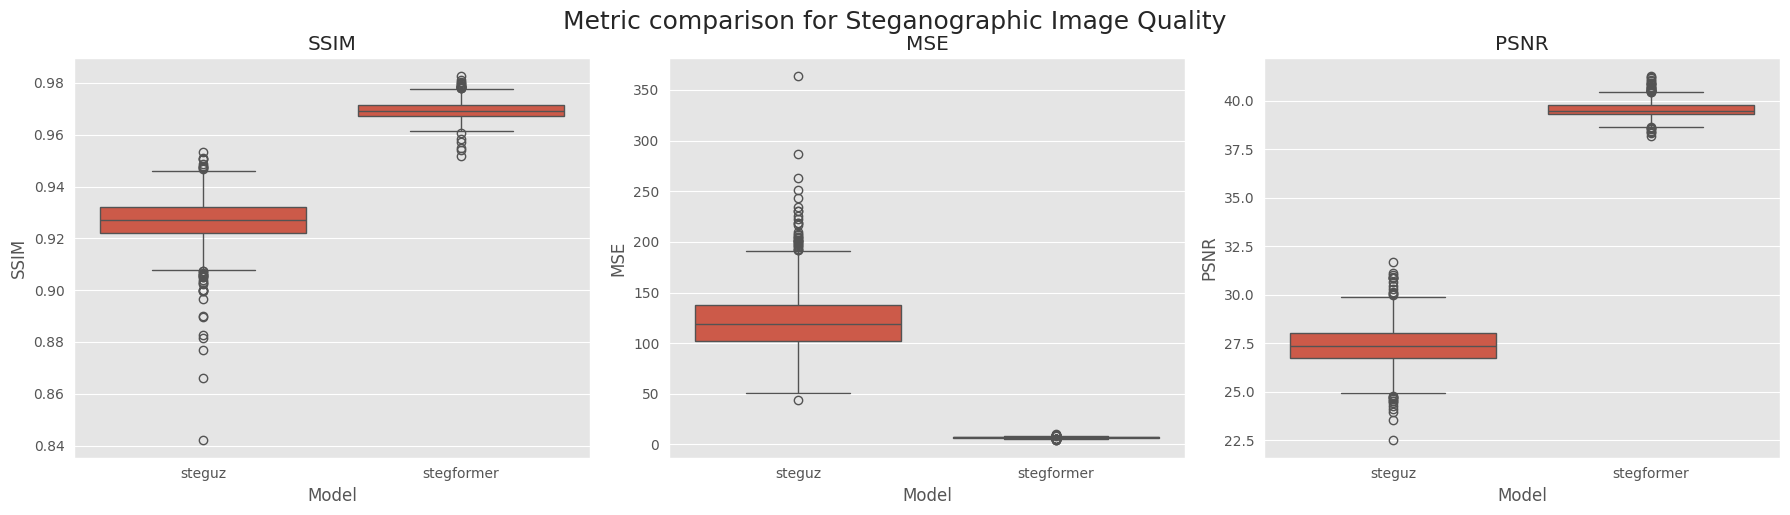

In [13]:
def plot_stego_image_quality(df_hiding):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')

    # seed
    np.random.seed(42)
    
    # Configuración del gráfico con 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Columnas de métricas a graficar
    metrics = ["ssim", "mse", "psnr"]
    titles = ["SSIM", "MSE", "PSNR"]
    
    # Generar un boxplot para cada métrica
    for i, metric in enumerate(metrics):
        sns.boxplot(x="model", y=metric, data=df_hiding, ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("Model")
        axes[i].set_ylabel(metric.upper())

    plt.tight_layout()
    plt.suptitle("Metric comparison for Steganographic Image Quality", y=1.02, fontsize=18)
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/stego_quality.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/stego_quality.pdf')
    
    plt.show()

plot_stego_image_quality(df_hiding)

In [59]:
df_hiding.groupby(by=['model']).agg({'ssim':['mean', 'std'],
                                                                        'mse':['mean', 'std'],
                                                                        'psnr':['mean', 'std']})

ssim                   mse                  psnr          
                mean       std        mean        std       mean       std
model                                                                     
stegformer  0.969561  0.003454    7.225289   0.652584  39.560545  0.403019
steguz      0.926571  0.009739  123.274405  33.494878  27.371982  1.139743

## Transformation effects (Stego image vs Transformed stego image)

In [14]:
mapping_dict = df_transformations[['variant', 'parameters']].drop_duplicates().set_index('variant')['parameters'].to_dict()

In [15]:
# Effect of the transformations and their impact on the stego images
summary_transformations = df_transformations.groupby(['model','transformation', 'variant'])[['ssim', 'mse', 'psnr']].agg(['mean', 'std'])
summary_transformations.reset_index(inplace=True)
summary_transformations.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary_transformations.columns.values]

In [16]:
summary_transformations

model transformation        variant  ssim_mean  ssim_std  \
0   stegformer    compression  compression_1   0.971749  0.003163   
1   stegformer    compression  compression_2   0.969976  0.003325   
2   stegformer    compression  compression_3   0.953594  0.003098   
3   stegformer    compression  compression_4   0.942450  0.003753   
4   stegformer    compression  compression_5   0.967561  0.003371   
..         ...            ...            ...        ...       ...   
91      steguz     sharpening   sharpening_4   0.584570  0.012566   
92      steguz     sharpening   sharpening_5   0.663789  0.020576   
93      steguz     sharpening   sharpening_6   0.685197  0.032178   
94      steguz     sharpening   sharpening_7   0.671125  0.036138   
95      steguz     sharpening   sharpening_8   0.655357  0.039673   

       mse_mean     mse_std  psnr_mean  psnr_std  
0      3.659827    0.184872  42.501540  0.213687  
1      3.900806    0.189179  42.224199  0.205599  
2      8.739693    1.149784  38.750960  0.544544  
3     13.230380    2.316764  36.975751  0.712277  
4      4.546884    0.220633  41.558608  0.205691  
..          ...         ...        ...       ...  
91   458.841710   78.109513  21.570260  0.681914  
92   533.252460   82.461682  20.909305  0.634565  
93  1945.264873  302.628415  15.296515  0.706874  
94  2960.534989  419.126060  13.462109  0.633214  
95  3855.740865  478.973694  12.303146  0.540256  

[96 rows x 9 columns]

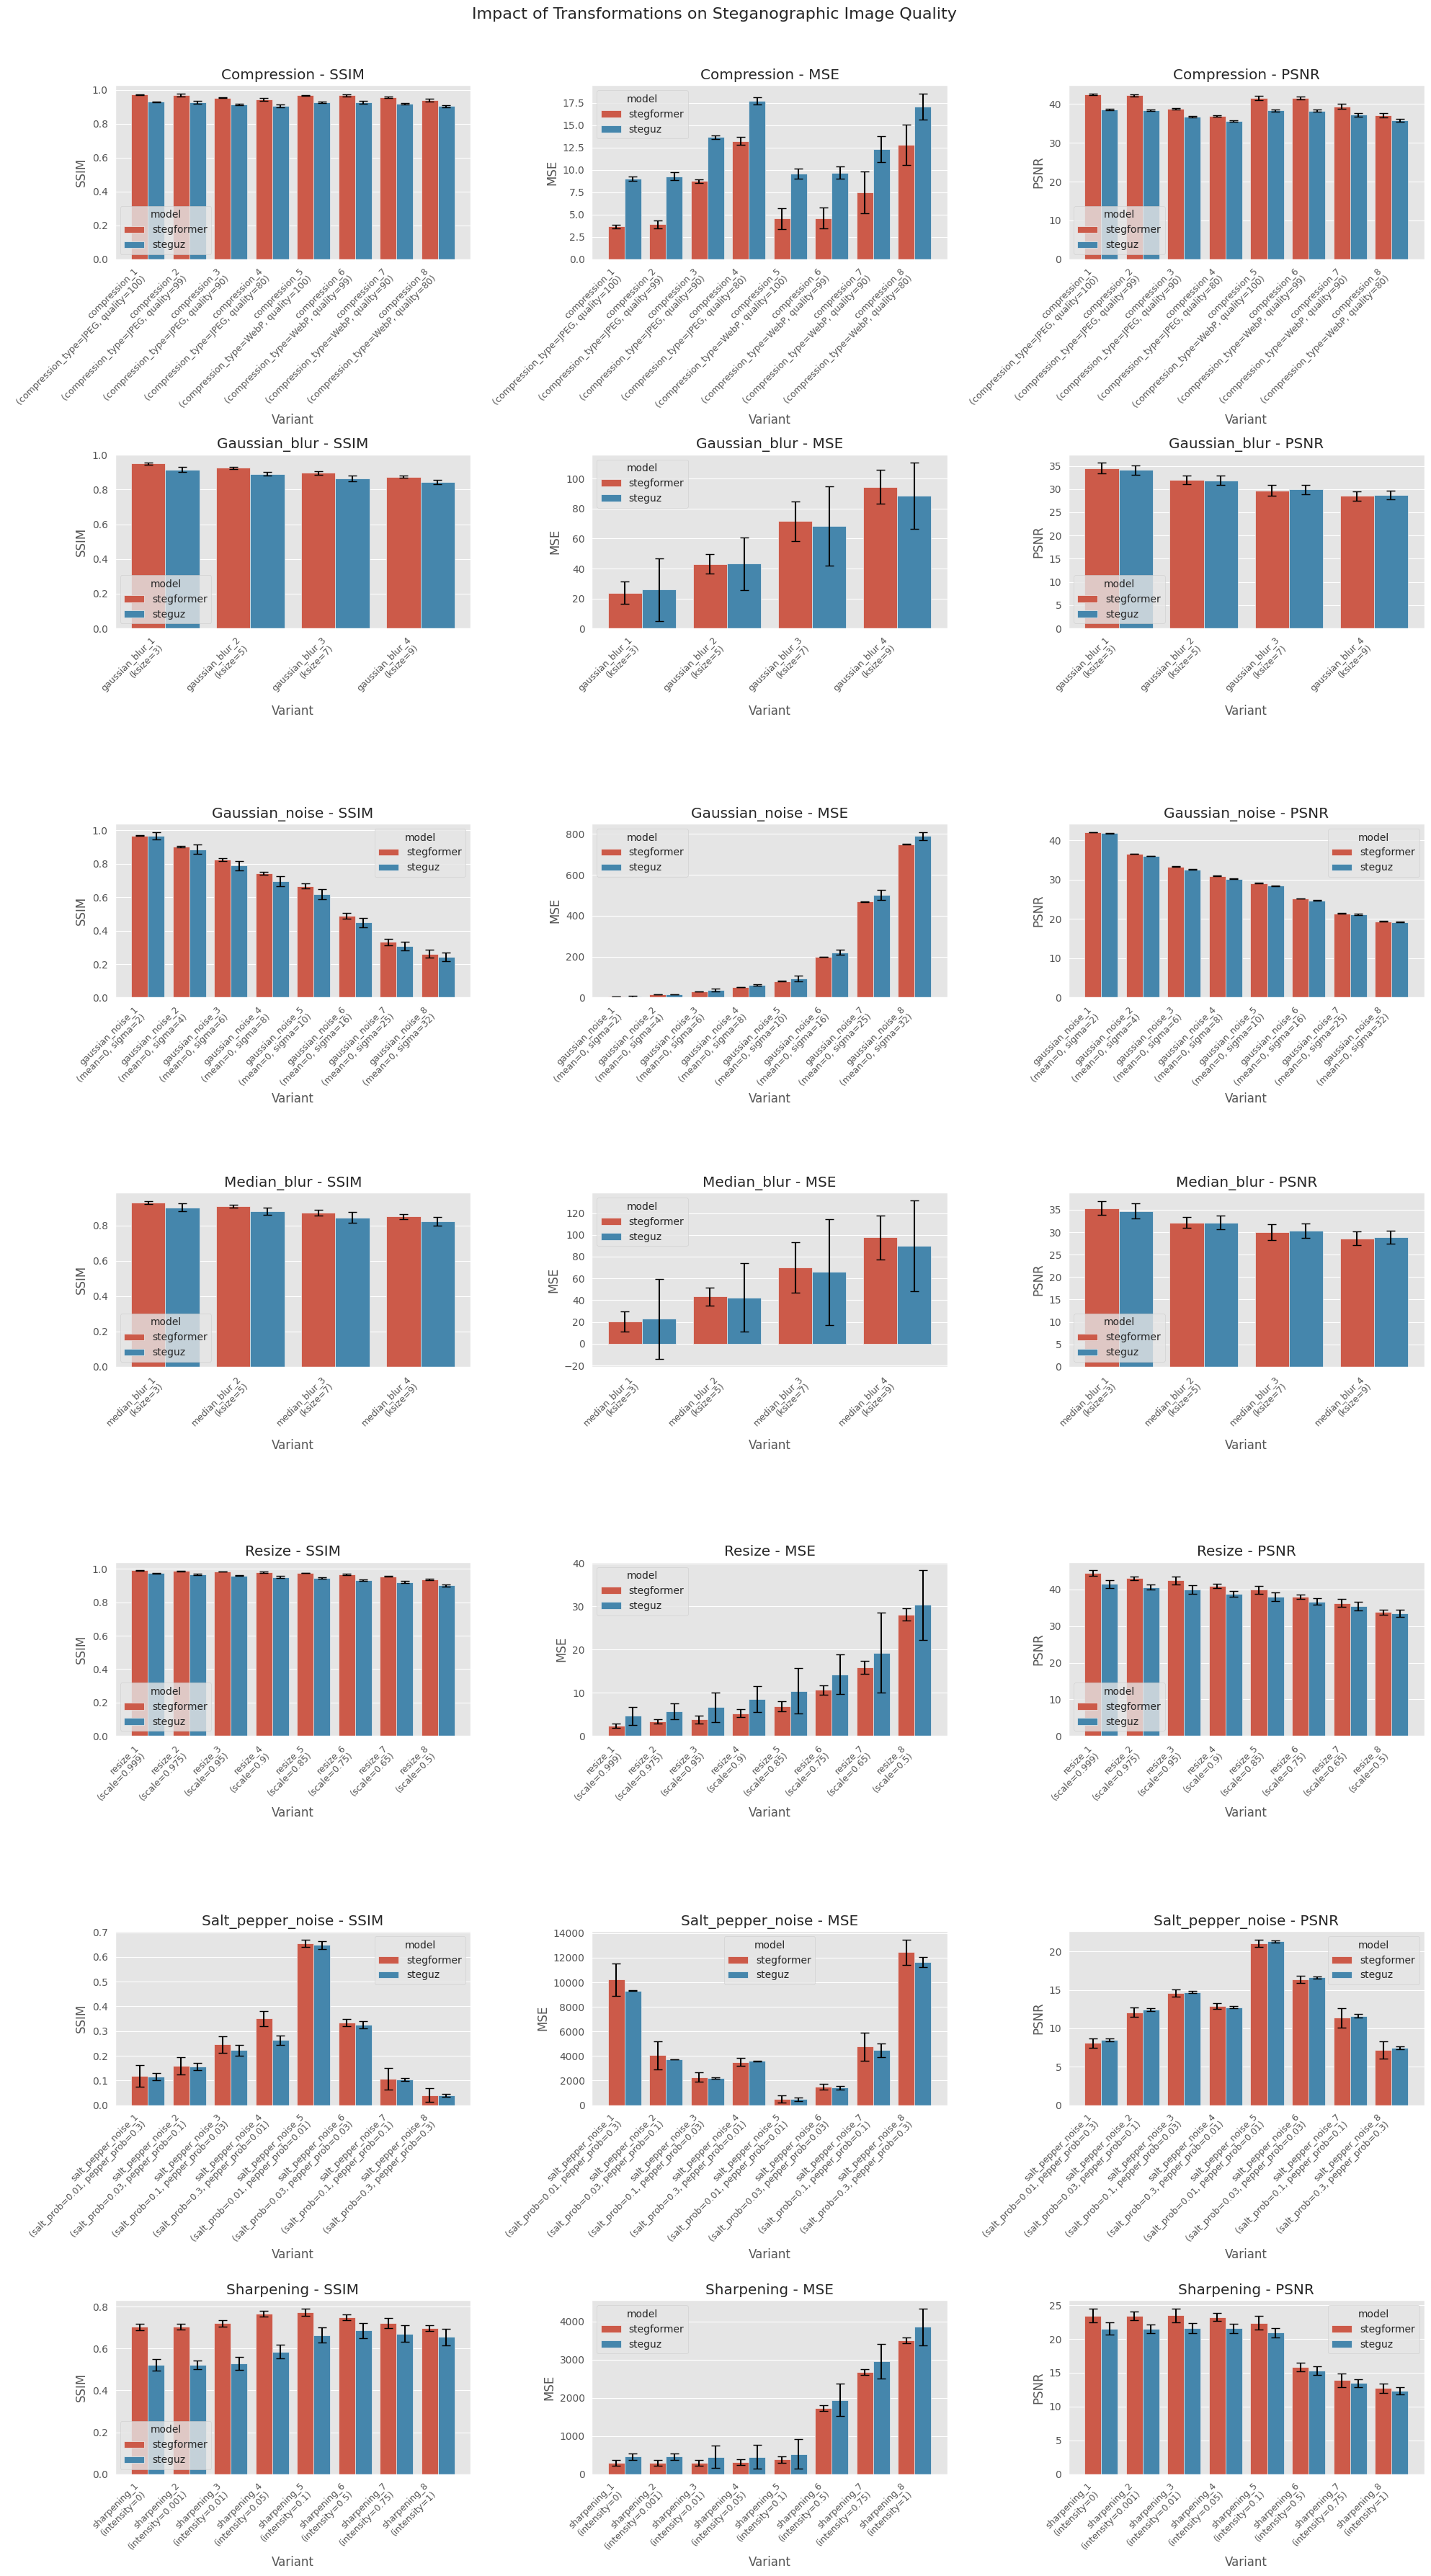

In [17]:
def plot_transformations_effect_on_stego(summary_transformations, variant_params):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')
    
    # seed
    np.random.seed(42)
    
    # required column in the dataframe:
    # ['model', 'transformation', 'variant', 'ssim_mean', 'ssim_std', 'mse_mean', 'mse_std', 'psnr_mean', 'psnr_std']
    
    transformations = summary_transformations.transformation.unique().tolist()
    metrics = [("ssim_mean", "ssim_std"), ("mse_mean", "mse_std"), ("psnr_mean", "psnr_std")]
    titles = ["SSIM", "MSE", "PSNR"]
    
    fig, axes = plt.subplots(len(transformations), len(metrics), figsize=(20, 5 * len(transformations)))
    
    # Ajustar en caso de una sola fila
    if len(transformations) == 1:
        axes = np.expand_dims(axes, axis=0)
    
    # Iterar correctamente por cada transformación y métrica
    for row_idx, transformation in enumerate(transformations):
        subset = summary_transformations[summary_transformations.transformation == transformation]
        variants = subset['variant'].unique()
        models = subset['model'].unique()
        for col_idx, ((metric_mean, metric_std), title) in enumerate(zip(metrics, titles)):
            ax = axes[row_idx, col_idx]
            sns.barplot(x="variant", y=metric_mean, hue="model", data=subset, ax=ax, capsize=0.1)
    
            # Añadir barras de error correctamente alineadas
            for bar, (variant, model) in zip(ax.patches, [(v, m) for v in variants for m in models]):
                std_value = subset[(subset['variant'] == variant) & (subset['model'] == model)][metric_std].values[0]
                ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                            yerr=std_value, fmt='none', c='black', capsize=4)
    
            # Corregir las etiquetas
            # Crear etiquetas mejoradas con parámetros
            new_labels = [f"{v}\n({variant_params.get(v, '')})" for v in variants]
            ax.set_xticklabels(new_labels, rotation=45, ha="right", fontsize=9)
            ax.set_title(f"{transformation.capitalize()} - {title}")
            ax.set_xlabel("Variant")
            ax.set_ylabel(title)
    
    plt.tight_layout()
    plt.suptitle("Impact of Transformations on Steganographic Image Quality", y=1.02, fontsize=16)
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_stego.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_stego.pdf')
    
    plt.show()

variant_params = {k: v.replace("{", "").replace("}", "").replace("'", "").replace(": ", "=") for k, v in mapping_dict.items()}
plot_transformations_effect_on_stego(summary_transformations, variant_params)

### Trasformations on stego including morphing

In [18]:
mapping_dict_2 = df_manipulations[['variant', 'parameters']].drop_duplicates().set_index('variant')['parameters'].to_dict()
variant_params_2 = {k: v.replace("{", "").replace("}", "").replace("'", "").replace(": ", "=") for k, v in mapping_dict_2.items()}

In [19]:
summary_manipulations = df_manipulations.groupby(['model','manipulation', 'variant'])[['ssim', 'mse', 'psnr']].agg(['mean', 'std'])
summary_manipulations.reset_index(inplace=True)
summary_manipulations.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary_manipulations.columns.values]

In [20]:
summary_manipulations.rename(columns={'manipulation':'transformation'}, inplace=True)

In [21]:
summary_all_trasnformations = pd.concat([summary_transformations, summary_manipulations], ignore_index=True)
summary_all_trasnformations

model transformation        variant  ssim_mean  ssim_std  \
0    stegformer    compression  compression_1   0.971749  0.003163   
1    stegformer    compression  compression_2   0.969976  0.003325   
2    stegformer    compression  compression_3   0.953594  0.003098   
3    stegformer    compression  compression_4   0.942450  0.003753   
4    stegformer    compression  compression_5   0.967561  0.003371   
..          ...            ...            ...        ...       ...   
107      steguz       morphing        morph_4   0.852237  0.029104   
108      steguz       morphing        morph_5   0.852216  0.029156   
109      steguz       morphing        morph_6   0.852266  0.029149   
110      steguz       morphing        morph_7   0.852291  0.029064   
111      steguz       morphing        morph_8   0.852315  0.029170   

       mse_mean    mse_std  psnr_mean  psnr_std  
0      3.659827   0.184872  42.501540  0.213687  
1      3.900806   0.189179  42.224199  0.205599  
2      8.739693   1.149784  38.750960  0.544544  
3     13.230380   2.316764  36.975751  0.712277  
4      4.546884   0.220633  41.558608  0.205691  
..          ...        ...        ...       ...  
107  171.827692  57.760579  26.013440  1.434773  
108  171.975504  58.180908  26.011657  1.439086  
109  171.703042  57.791503  26.017001  1.435889  
110  171.781728  57.899475  26.015607  1.437439  
111  171.757624  58.043975  26.016720  1.437747  

[112 rows x 9 columns]

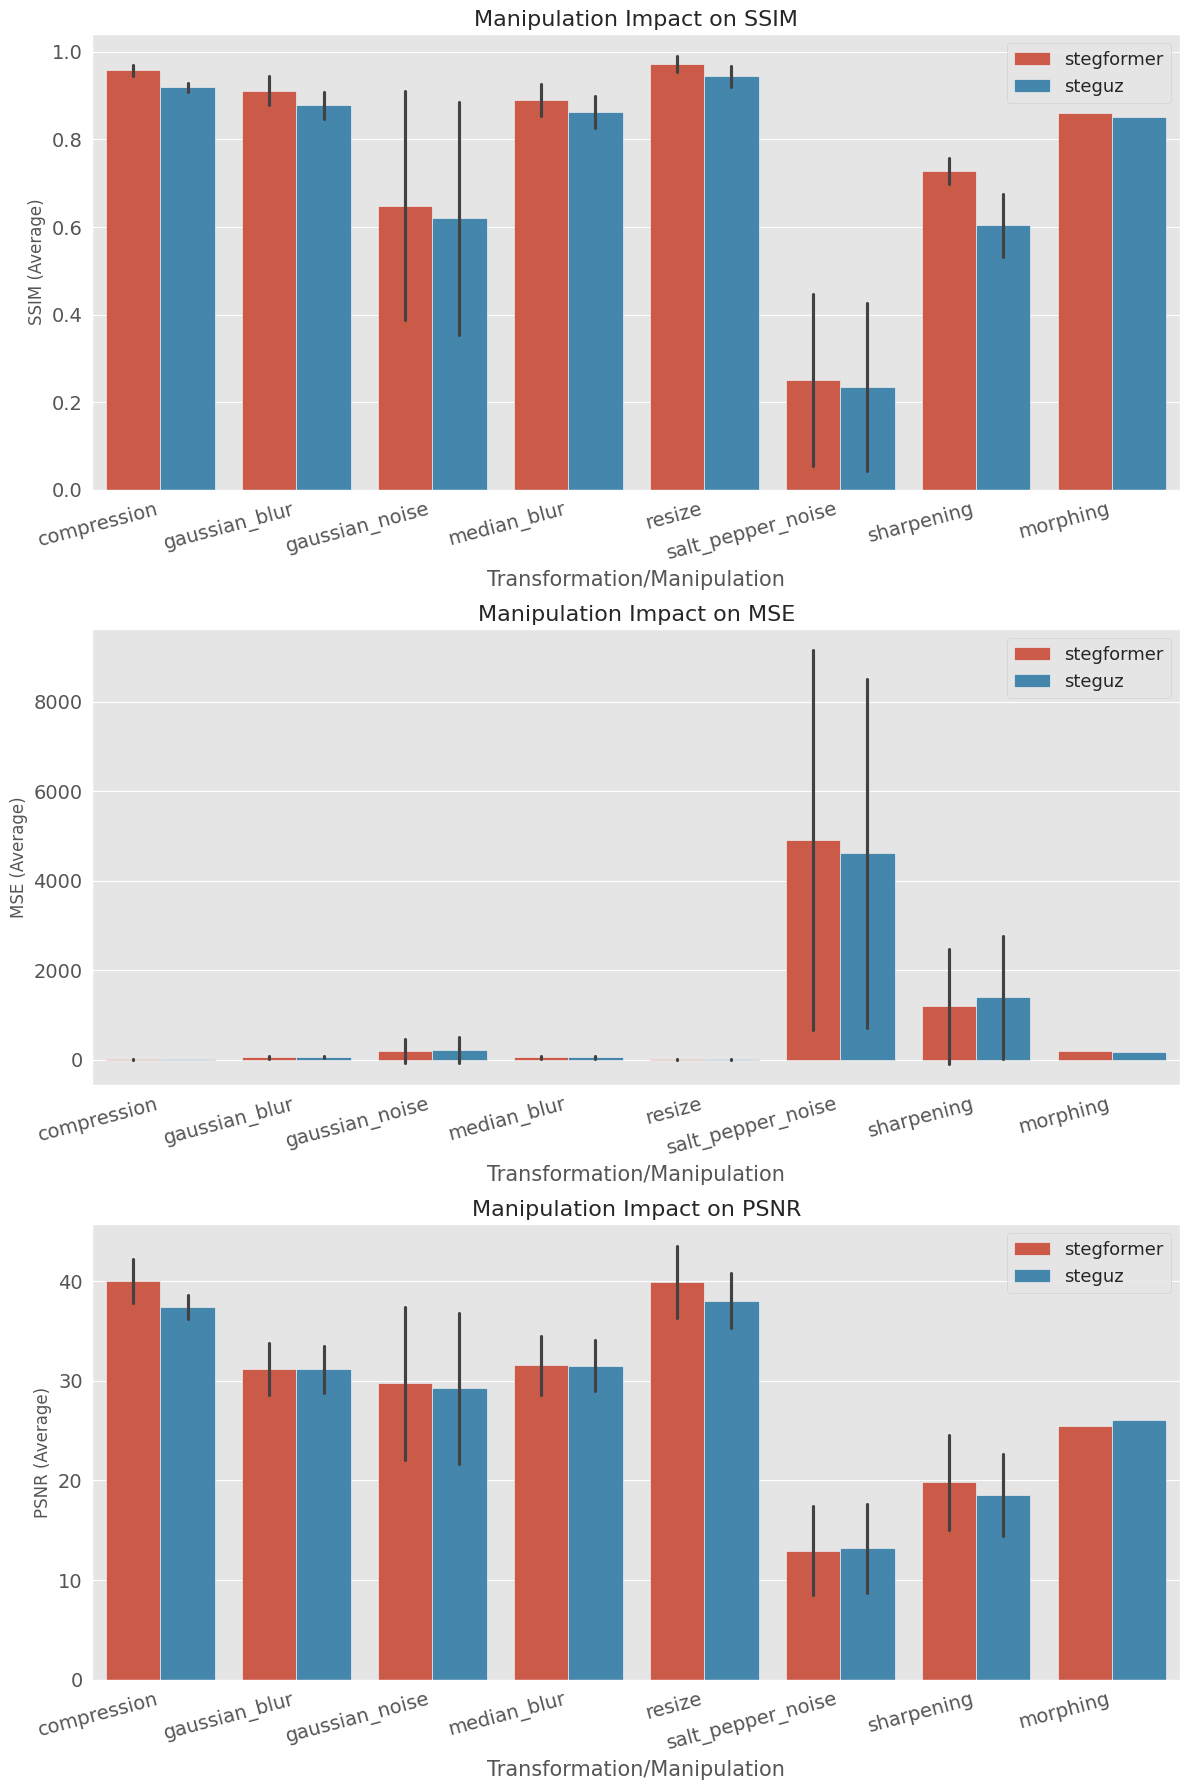

In [31]:
def plot_general_impact_manipulation_on_stego(summary_all_trasnformations):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    
    metrics = [("ssim_mean", "SSIM (Average)"), ("mse_mean", "MSE (Average)"), ("psnr_mean", "PSNR (Average)")]
    titles = ["Manipulation Impact on SSIM",
              "Manipulation Impact on MSE",
              "Manipulation Impact on PSNR"]
    
    for ax, (metric, ylabel), title in zip(axes, metrics, titles):
        sns.barplot(x="transformation", y=metric, hue="model", data=summary_all_trasnformations, ci="sd", ax=ax)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel("Transformation/Manipulation", fontsize=15)
        ax.set_ylabel(ylabel)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right', fontsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.legend(fontsize=13)
    
    plt.tight_layout()
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/general_effects_on_stego.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/general_effects_on_stego.pdf')
    
    plt.show()

plot_general_impact_manipulation_on_stego(summary_all_trasnformations)

## Revealing performace (Secret image vs Recovered image)

In [32]:
df_revealing

dataset       model  \
0      CFD_one_shot      steguz   
1      CFD_one_shot      steguz   
2      CFD_one_shot      steguz   
3      CFD_one_shot      steguz   
4      CFD_one_shot      steguz   
...             ...         ...   
94273  CFD_one_shot  stegformer   
94274  CFD_one_shot  stegformer   
94275  CFD_one_shot  stegformer   
94276  CFD_one_shot  stegformer   
94277  CFD_one_shot  stegformer   

                                             input_image  \
0      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
2      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
3      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
4      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
...                                                  ...   
94273                                                NaN   
94274                                                NaN   
94275                                                NaN   
94276                                                NaN   
94277                                                NaN   

                                            output_image      ssim  \
0      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.568989   
1      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.565608   
2      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.566107   
3      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.566772   
4      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.569296   
...                                                  ...       ...   
94273  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950326   
94274  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950036   
94275  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.949661   
94276  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.949619   
94277  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950996   

               mse       psnr  
0      3742.904410  12.398716  
1      3823.522361  12.306167  
2      3817.318346  12.313220  
3      3785.857561  12.349161  
4      3701.653367  12.446846  
...            ...        ...  
94273    36.856671  32.465643  
94274    36.719401  32.481848  
94275    37.440191  32.397423  
94276    37.533854  32.386572  
94277    36.827089  32.469130  

[94278 rows x 7 columns]

In [33]:
transformations = [
    'resize', 'gaussian_noise', 'salt_pepper_noise', 
    'compression', 'sharpening', 'gaussian_blur', 'median_blur',
    'morphGEN'
]
def get_operation(path, transformations):
    for transformation in transformations:
        if transformation in path:
            if transformation == 'morphGEN':
                return 'morphing'
            return transformation
    return 'stego'
    
df_revealing['operation'] = df_revealing['output_image'].apply(lambda path: get_operation(path, transformations))
df_revealing

dataset       model  \
0      CFD_one_shot      steguz   
1      CFD_one_shot      steguz   
2      CFD_one_shot      steguz   
3      CFD_one_shot      steguz   
4      CFD_one_shot      steguz   
...             ...         ...   
94273  CFD_one_shot  stegformer   
94274  CFD_one_shot  stegformer   
94275  CFD_one_shot  stegformer   
94276  CFD_one_shot  stegformer   
94277  CFD_one_shot  stegformer   

                                             input_image  \
0      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
2      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
3      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
4      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
...                                                  ...   
94273                                                NaN   
94274                                                NaN   
94275                                                NaN   
94276                                                NaN   
94277                                                NaN   

                                            output_image      ssim  \
0      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.568989   
1      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.565608   
2      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.566107   
3      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.566772   
4      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.569296   
...                                                  ...       ...   
94273  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950326   
94274  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950036   
94275  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.949661   
94276  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.949619   
94277  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950996   

               mse       psnr operation  
0      3742.904410  12.398716  morphing  
1      3823.522361  12.306167  morphing  
2      3817.318346  12.313220  morphing  
3      3785.857561  12.349161  morphing  
4      3701.653367  12.446846  morphing  
...            ...        ...       ...  
94273    36.856671  32.465643     stego  
94274    36.719401  32.481848     stego  
94275    37.440191  32.397423     stego  
94276    37.533854  32.386572     stego  
94277    36.827089  32.469130     stego  

[94278 rows x 8 columns]

In [34]:
df_revealing.groupby('operation').count()

dataset  model  input_image  output_image   ssim    mse  \
operation                                                                    
compression          13232  13232         6616         13232  13232  13232   
gaussian_blur         6616   6616         3308          6616   6616   6616   
gaussian_noise       13232  13232         6616         13232  13232  13232   
median_blur           6616   6616         3308          6616   6616   6616   
morphing             13232  13232         6616         13232  13232  13232   
resize               13232  13232         6616         13232  13232  13232   
salt_pepper_noise    13232  13232         6616         13232  13232  13232   
sharpening           13232  13232         6616         13232  13232  13232   
stego                 1654   1654          827          1654   1654   1654   

                    psnr  
operation                 
compression        13232  
gaussian_blur       6616  
gaussian_noise     13232  
median_blur         6616  
morphing           13232  
resize             13232  
salt_pepper_noise  13232  
sharpening         13232  
stego               1654

In [35]:
import re
def get_variant(path, transformations):
    for transformation in transformations:
        if transformation == 'morphGEN':
            transformation = 'morph'
        match = re.search(rf"{transformation}_\d+", path)
        if match:
            return match.group(0)
    return 'stego'

df_revealing['variant'] = df_revealing['output_image'].apply(lambda path: get_variant(path, transformations))

In [36]:
df_revealing.groupby('variant').count()

dataset  model  input_image  output_image  ssim   mse  \
variant                                                                      
compression_1           1654   1654          827          1654  1654  1654   
compression_2           1654   1654          827          1654  1654  1654   
compression_3           1654   1654          827          1654  1654  1654   
compression_4           1654   1654          827          1654  1654  1654   
compression_5           1654   1654          827          1654  1654  1654   
compression_6           1654   1654          827          1654  1654  1654   
compression_7           1654   1654          827          1654  1654  1654   
compression_8           1654   1654          827          1654  1654  1654   
gaussian_blur_1         1654   1654          827          1654  1654  1654   
gaussian_blur_2         1654   1654          827          1654  1654  1654   
gaussian_blur_3         1654   1654          827          1654  1654  1654   
gaussian_blur_4         1654   1654          827          1654  1654  1654   
gaussian_noise_1        1654   1654          827          1654  1654  1654   
gaussian_noise_2        1654   1654          827          1654  1654  1654   
gaussian_noise_3        1654   1654          827          1654  1654  1654   
gaussian_noise_4        1654   1654          827          1654  1654  1654   
gaussian_noise_5        1654   1654          827          1654  1654  1654   
gaussian_noise_6        1654   1654          827          1654  1654  1654   
gaussian_noise_7        1654   1654          827          1654  1654  1654   
gaussian_noise_8        1654   1654          827          1654  1654  1654   
median_blur_1           1654   1654          827          1654  1654  1654   
median_blur_2           1654   1654          827          1654  1654  1654   
median_blur_3           1654   1654          827          1654  1654  1654   
median_blur_4           1654   1654          827          1654  1654  1654   
morph_1                 1654   1654          827          1654  1654  1654   
morph_2                 1654   1654          827          1654  1654  1654   
morph_3                 1654   1654          827          1654  1654  1654   
morph_4                 1654   1654          827          1654  1654  1654   
morph_5                 1654   1654          827          1654  1654  1654   
morph_6                 1654   1654          827          1654  1654  1654   
morph_7                 1654   1654          827          1654  1654  1654   
morph_8                 1654   1654          827          1654  1654  1654   
resize_1                1654   1654          827          1654  1654  1654   
resize_2                1654   1654          827          1654  1654  1654   
resize_3                1654   1654          827          1654  1654  1654   
resize_4                1654   1654          827          1654  1654  1654   
resize_5                1654   1654          827          1654  1654  1654   
resize_6                1654   1654          827          1654  1654  1654   
resize_7                1654   1654          827          1654  1654  1654   
resize_8                1654   1654          827          1654  1654  1654   
salt_pepper_noise_1     1654   1654          827          1654  1654  1654   
salt_pepper_noise_2     1654   1654          827          1654  1654  1654   
salt_pepper_noise_3     1654   1654          827          1654  1654  1654   
salt_pepper_noise_4     1654   1654          827          1654  1654  1654   
salt_pepper_noise_5     1654   1654          827          1654  1654  1654   
salt_pepper_noise_6     1654   1654          827          1654  1654  1654   
salt_pepper_noise_7     1654   1654          827          1654  1654  1654   
salt_pepper_noise_8     1654   1654          827          1654  1654  1654   
sharpening_1            1654   1654          827          1654  1654  1654   
sharpening_2            1654   1654        

In [37]:
df_revealing[(df_revealing.variant=='median_blur_1') & (df_revealing.model=='stegformer')].output_image.iloc[0]

'/app/output/reveal/CFD_one_shot/CFD_one_shot_stegformer/transformations/median_blur/median_blur_1/AF-200/CFD-AF-200-228-N_recovered.png'

In [38]:
df_revealing['parameters'] = df_revealing['variant'].map(mapping_dict)
df_revealing

dataset       model  \
0      CFD_one_shot      steguz   
1      CFD_one_shot      steguz   
2      CFD_one_shot      steguz   
3      CFD_one_shot      steguz   
4      CFD_one_shot      steguz   
...             ...         ...   
94273  CFD_one_shot  stegformer   
94274  CFD_one_shot  stegformer   
94275  CFD_one_shot  stegformer   
94276  CFD_one_shot  stegformer   
94277  CFD_one_shot  stegformer   

                                             input_image  \
0      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
1      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
2      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
3      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
4      /app/data/processed/CFD_one_shot/CFD_one_shot_...   
...                                                  ...   
94273                                                NaN   
94274                                                NaN   
94275                                                NaN   
94276                                                NaN   
94277                                                NaN   

                                            output_image      ssim  \
0      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.568989   
1      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.565608   
2      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.566107   
3      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.566772   
4      /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.569296   
...                                                  ...       ...   
94273  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950326   
94274  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950036   
94275  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.949661   
94276  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.949619   
94277  /app/output/reveal/CFD_one_shot/CFD_one_shot_s...  0.950996   

               mse       psnr operation  variant parameters  
0      3742.904410  12.398716  morphing  morph_1        NaN  
1      3823.522361  12.306167  morphing  morph_2        NaN  
2      3817.318346  12.313220  morphing  morph_3        NaN  
3      3785.857561  12.349161  morphing  morph_4        NaN  
4      3701.653367  12.446846  morphing  morph_5        NaN  
...            ...        ...       ...      ...        ...  
94273    36.856671  32.465643     stego    stego        NaN  
94274    36.719401  32.481848     stego    stego        NaN  
94275    37.440191  32.397423     stego    stego        NaN  
94276    37.533854  32.386572     stego    stego        NaN  
94277    36.827089  32.469130     stego    stego        NaN  

[94278 rows x 10 columns]

### Baseline (recovered secret from the stego image without transformations)

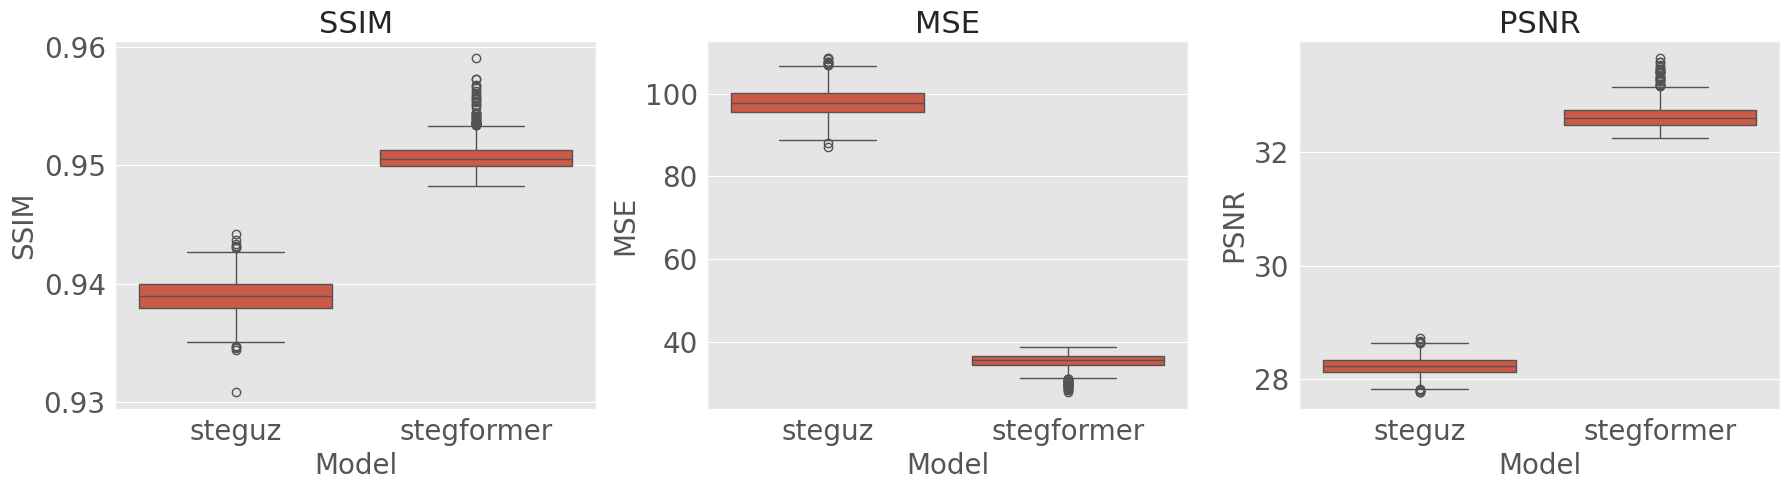

In [55]:
def plot_recover_baselines(df_revealing):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')

    # seed
    np.random.seed(42)
    
    # Configuración del gráfico con 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Columnas de métricas a graficar
    metrics = ["ssim", "mse", "psnr"]
    titles = ["SSIM", "MSE", "PSNR"]
    
    # Generar un boxplot para cada métrica
    for i, metric in enumerate(metrics):
        sns.boxplot(x="model", y=metric, data=df_revealing, ax=axes[i])
        axes[i].set_title(titles[i], fontsize=22)
        axes[i].set_xlabel("Model", fontsize=20)
        axes[i].set_ylabel(metric.upper(), fontsize=20)
        axes[i].tick_params(axis='y', labelsize=20)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, fontsize=20)
        

    plt.tight_layout()
    #plt.suptitle("Metric comparison for Steganographic Image Recovery Quality", y=1.02, fontsize=16)
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/recovery_quality_baselines.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/recovery_quality_baselines.pdf')
    
    plt.show()

plot_recover_baselines(df_revealing[df_revealing.operation=='stego'])

In [57]:
df_revealing[df_revealing.operation=='stego'].groupby(by=['model']).agg({'ssim':['mean', 'std'],
                                                                        'mse':['mean', 'std'],
                                                                        'psnr':['mean', 'std']})

ssim                  mse                 psnr          
                mean       std       mean       std       mean       std
model                                                                   
stegformer  0.950778  0.001327  35.349869  1.812966  32.652890  0.230393
steguz      0.938943  0.001524  97.914851  3.506953  28.225085  0.154958

### Recovered secret from the transformed stego image

In [46]:
summary_revealed = df_revealing.groupby(['model','operation', 'variant'])[['ssim', 'mse', 'psnr']].agg(['mean', 'std'])
summary_revealed.reset_index(inplace=True)
summary_revealed.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary_revealed.columns.values]
summary_revealed

model    operation        variant  ssim_mean  ssim_std  \
0    stegformer  compression  compression_1   0.170492  0.006372   
1    stegformer  compression  compression_2   0.168400  0.006275   
2    stegformer  compression  compression_3   0.187159  0.009693   
3    stegformer  compression  compression_4   0.190467  0.009257   
4    stegformer  compression  compression_5   0.157702  0.006403   
..          ...          ...            ...        ...       ...   
109      steguz   sharpening   sharpening_5   0.658075  0.013283   
110      steguz   sharpening   sharpening_6   0.406401  0.032049   
111      steguz   sharpening   sharpening_7   0.386666  0.030214   
112      steguz   sharpening   sharpening_8   0.377967  0.029935   
113      steguz        stego          stego   0.938943  0.001524   

         mse_mean     mse_std  psnr_mean  psnr_std  
0    14099.193279  107.104147   6.638986  0.032991  
1    14115.291372  104.973414   6.634025  0.032296  
2    14085.551652  113.511455   6.643206  0.034968  
3    14127.112158  115.599174   6.630415  0.035517  
4    14095.975249  107.592606   6.639979  0.033154  
..            ...         ...        ...       ...  
109   1995.766058  111.355736  15.136219  0.235913  
110   7918.225367  753.599419   9.166138  0.445528  
111   8590.868208  829.056720   8.813064  0.457762  
112   9084.302279  841.739029   8.568984  0.443083  
113     97.914851    3.506953  28.225085  0.154958  

[114 rows x 9 columns]

In [47]:
summary_revealed.operation.unique()

array(['compression', 'gaussian_blur', 'gaussian_noise', 'median_blur',
       'morphing', 'resize', 'salt_pepper_noise', 'sharpening', 'stego'],
      dtype=object)

In [48]:
summary_revealed[summary_revealed.operation == 'median_blur']

model    operation        variant  ssim_mean  ssim_std      mse_mean  \
20  stegformer  median_blur  median_blur_1  -0.006148  0.014484  23215.470945   
21  stegformer  median_blur  median_blur_2   0.228637  0.011166   8328.563253   
22  stegformer  median_blur  median_blur_3   0.092723  0.008424  19055.418552   
23  stegformer  median_blur  median_blur_4   0.165773  0.007354  10655.185720   
77      steguz  median_blur  median_blur_1   0.215117  0.014838   8630.115232   
78      steguz  median_blur  median_blur_2   0.190174  0.011222  10327.438688   
79      steguz  median_blur  median_blur_3   0.158354  0.007439  11644.708204   
80      steguz  median_blur  median_blur_4   0.151387  0.006473  12120.221143   

       mse_std  psnr_mean  psnr_std  
20  947.693320   4.476719  0.180111  
21  306.140685   8.927973  0.157209  
22  596.492156   5.332763  0.136867  
23  264.106797   7.856507  0.106490  
77  618.276817   8.781293  0.301410  
78  654.543331   7.999224  0.266768  
79  569.505724   7.474538  0.207357  
80  521.573324   7.299600  0.182937

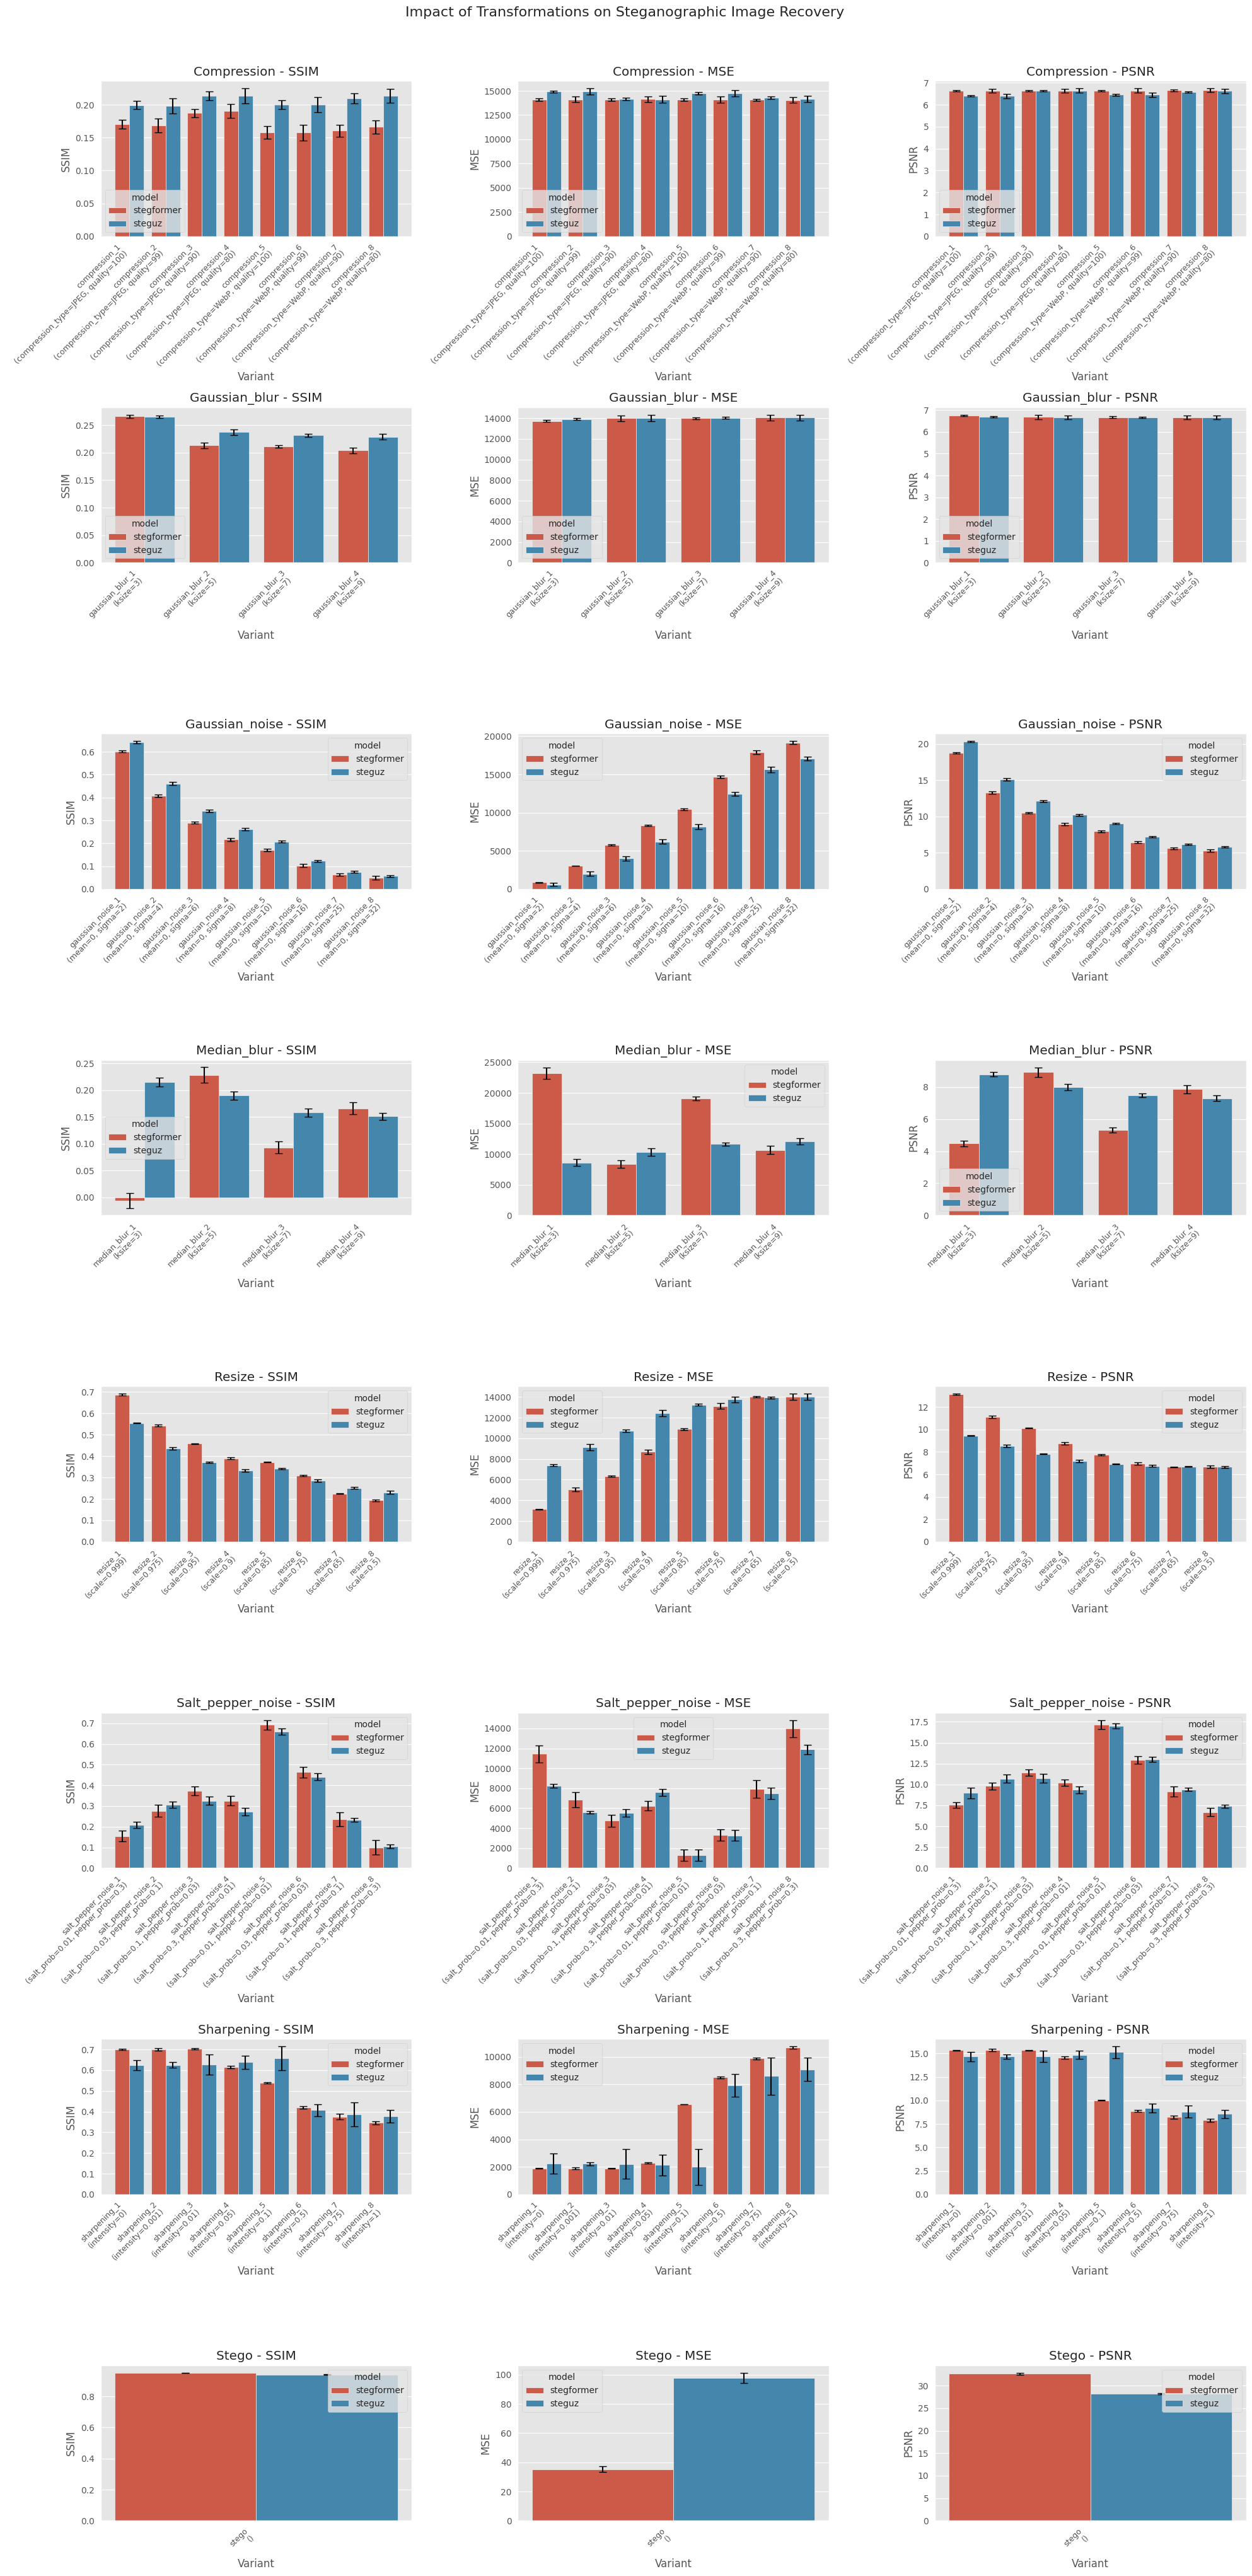

In [49]:
def plot_transformations_effect_on_revealed(summary_transformations, variant_params):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')
    
    # seed
    np.random.seed(42)
    
    # required column in the dataframe:
    # ['model', 'transformation', 'variant', 'ssim_mean', 'ssim_std', 'mse_mean', 'mse_std', 'psnr_mean', 'psnr_std']
    
    transformations = summary_transformations.operation.unique().tolist()
    metrics = [("ssim_mean", "ssim_std"), ("mse_mean", "mse_std"), ("psnr_mean", "psnr_std")]
    titles = ["SSIM", "MSE", "PSNR"]
    
    fig, axes = plt.subplots(len(transformations), len(metrics), figsize=(20, 5 * len(transformations)))
    
    # Ajustar en caso de una sola fila
    if len(transformations) == 1:
        axes = np.expand_dims(axes, axis=0)
    
    # Iterar correctamente por cada transformación y métrica
    for row_idx, transformation in enumerate(transformations):
        subset = summary_transformations[summary_transformations.operation == transformation]
        variants = subset['variant'].unique()
        models = subset['model'].unique()
        for col_idx, ((metric_mean, metric_std), title) in enumerate(zip(metrics, titles)):
            ax = axes[row_idx, col_idx]
            sns.barplot(x="variant", y=metric_mean, hue="model", data=subset, ax=ax, capsize=0.1)
    
            # Añadir barras de error correctamente alineadas
            for bar, (variant, model) in zip(ax.patches, [(v, m) for v in variants for m in models]):
                std_value = subset[(subset['variant'] == variant) & (subset['model'] == model)][metric_std].values[0]
                ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                            yerr=std_value, fmt='none', c='black', capsize=4)
    
            # Corregir las etiquetas
            # Crear etiquetas mejoradas con parámetros
            new_labels = [f"{v}\n({variant_params.get(v, '')})" for v in variants]
            ax.set_xticklabels(new_labels, rotation=45, ha="right", fontsize=9)
            ax.set_title(f"{transformation.capitalize()} - {title}")
            ax.set_xlabel("Variant")
            ax.set_ylabel(title)
    
    plt.tight_layout()
    plt.suptitle("Impact of Transformations on Steganographic Image Recovery", y=1.02, fontsize=16)
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_revealed.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_revealed.pdf')
    
    plt.show()

variant_params = {k: v.replace("{", "").replace("}", "").replace("'", "").replace(": ", "=") for k, v in mapping_dict.items()}
plot_transformations_effect_on_revealed(summary_revealed[summary_revealed.operation!='morphing'], variant_params)

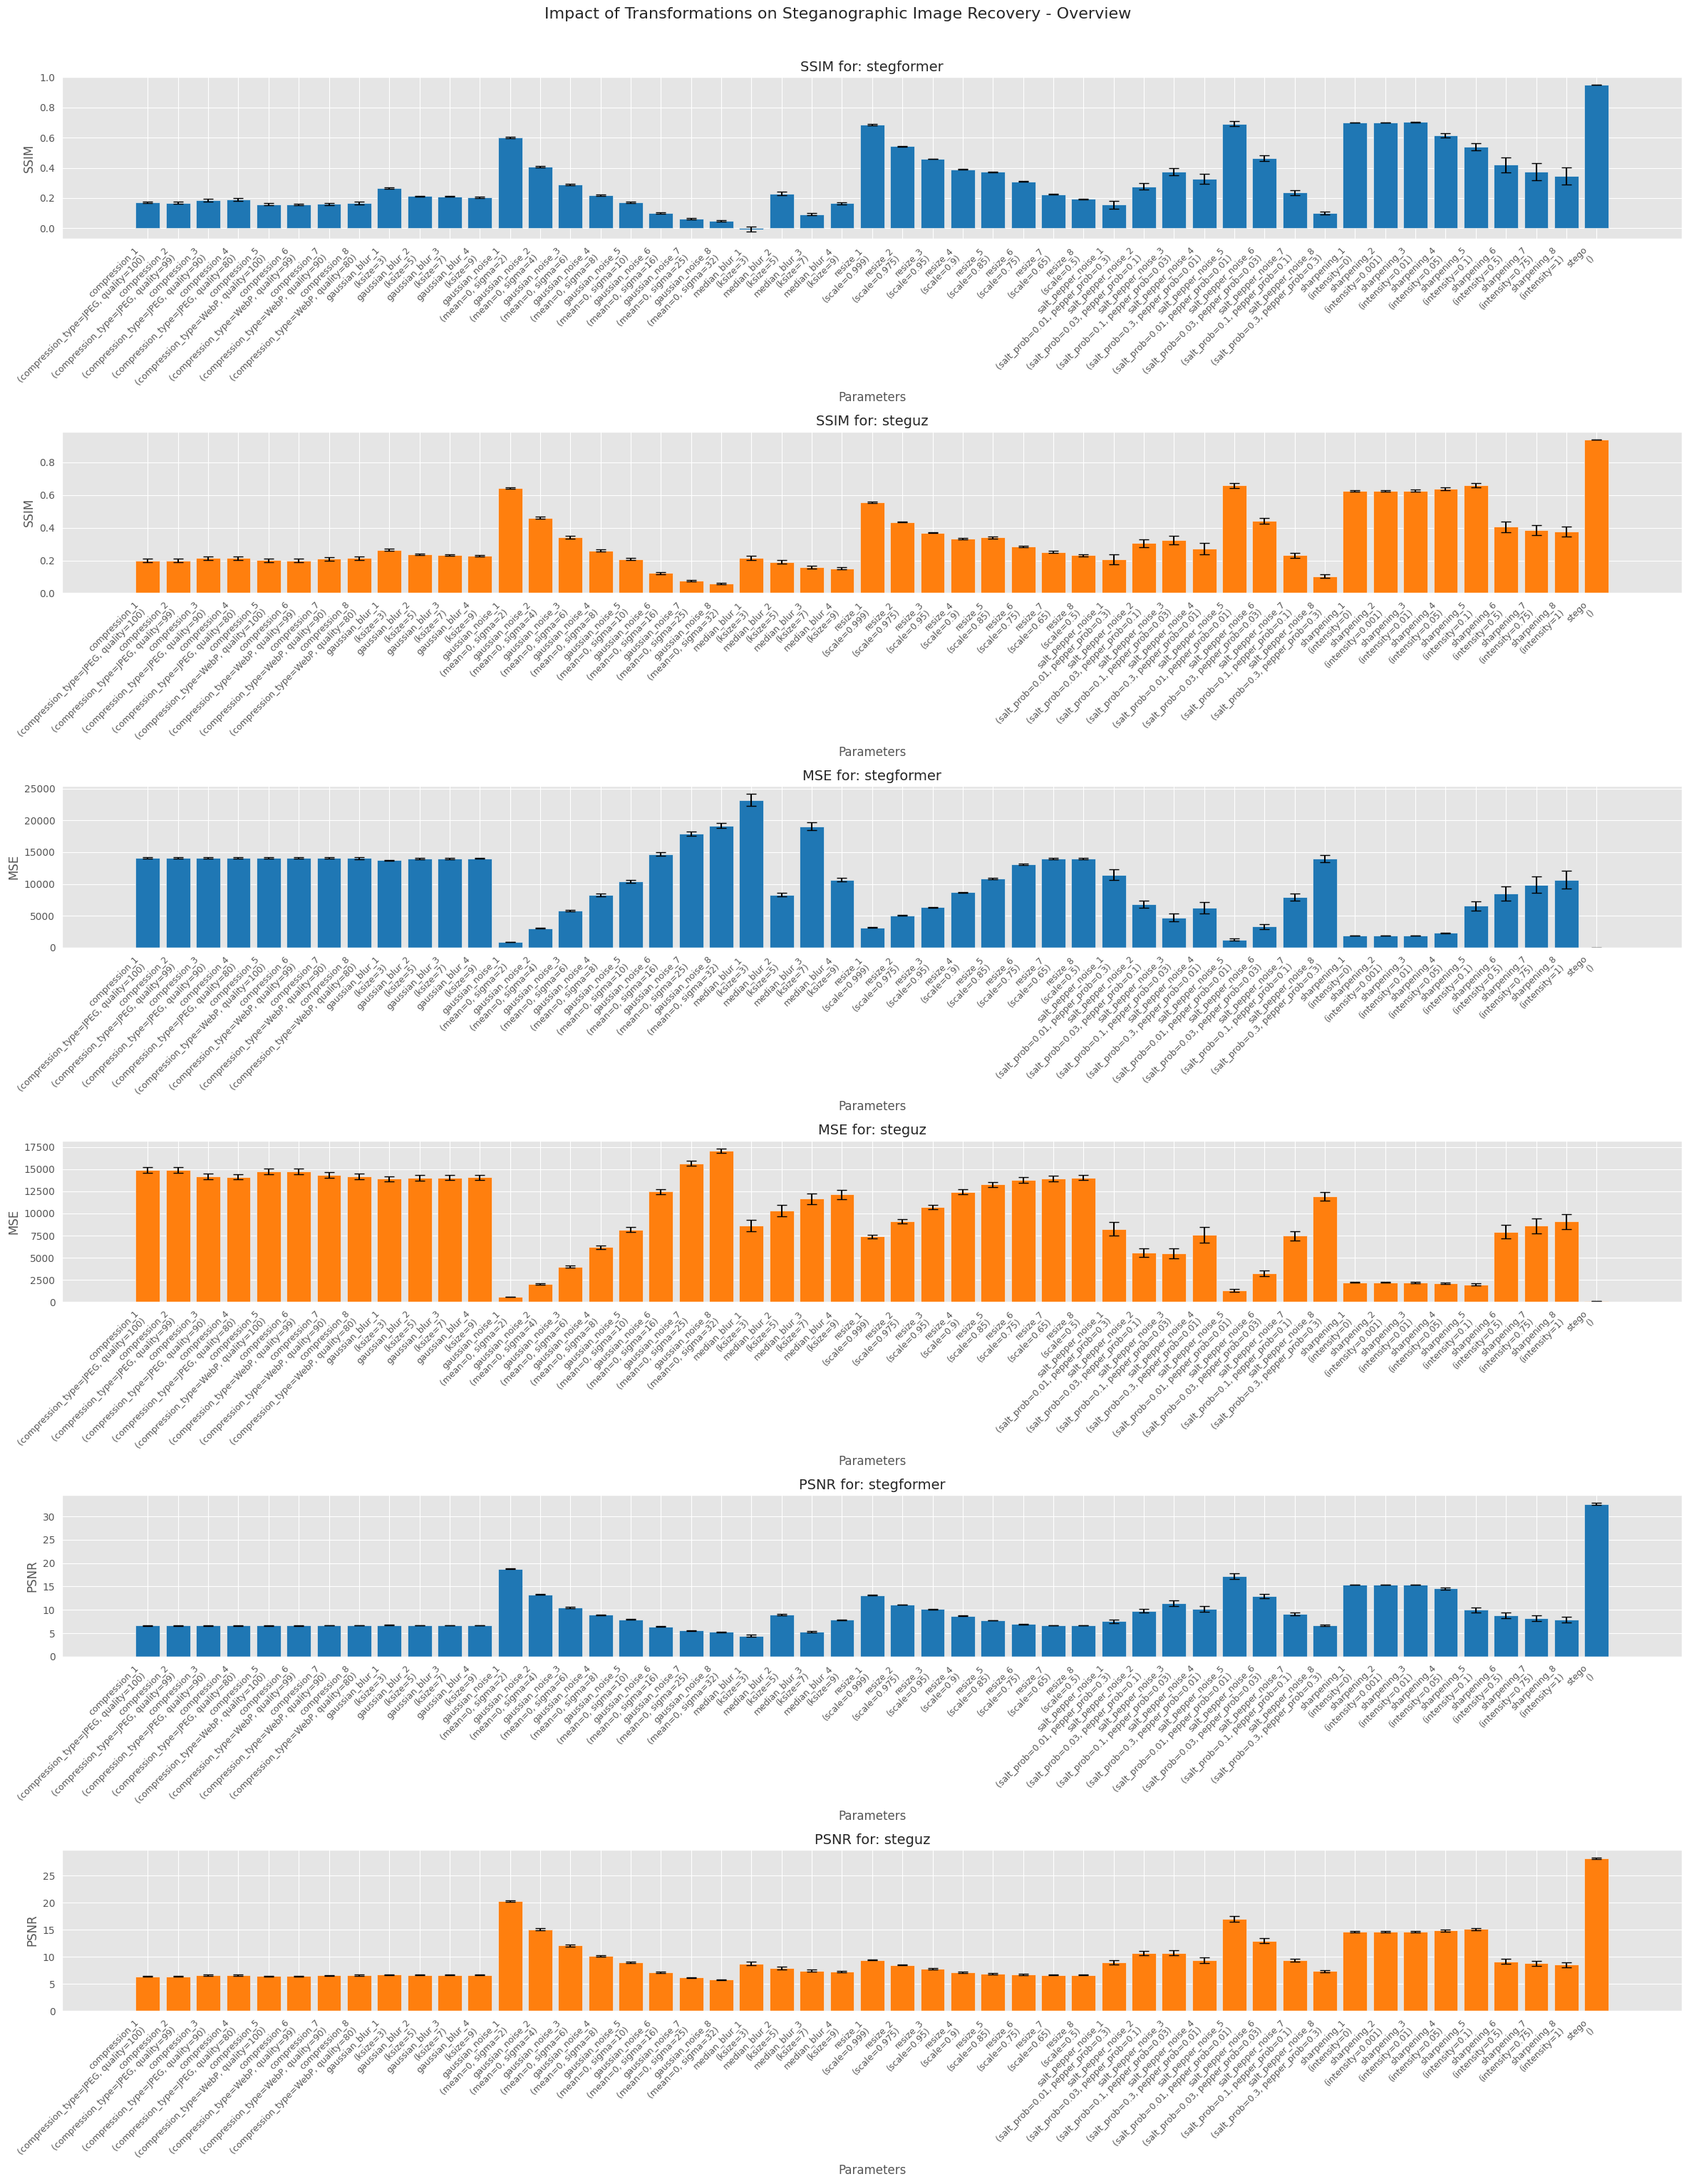

In [50]:
def plot_transformations_effect_on_revealed_by_model(summary_revealed, variant_params):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')
    
    # seed
    np.random.seed(42)

    fig, axes = plt.subplots(6, 1, figsize=(24, 30))  # 6 filas (2 por métrica)
    metrics = ['ssim', 'mse', 'psnr']
    titles = ['SSIM', 'MSE', 'PSNR']
    models = summary_revealed['model'].unique()
    colors = ['#1f77b4', '#ff7f0e']  # colores diferentes por modelo
    
    # índice para subplots
    ax_idx = 0
    
    for metric, title in zip(metrics, titles):
        for model, color in zip(models, colors):
            subset = summary_revealed[summary_revealed['model'] == model]
            mean_values = subset[f'{metric}_mean']
            std_values = subset[f'{metric}_std']
    
            # gráfica de barras con desviación estándar
            axes[ax_idx].bar(mean_values.index.astype(str), mean_values, yerr=std_values, 
                             capsize=5, color=color)
    
            axes[ax_idx].set_title(f'{title} for: {model}', fontsize=14)
            axes[ax_idx].set_ylabel(title)
            axes[ax_idx].set_xlabel('Parameters')
    
            # Generar etiquetas claras con variante y parámetros
            new_labels = [f"{v}\n({variant_params.get(v, '')})" for v in subset['variant']]
    
            # Aplicar etiquetas corregidas al eje x
            axes[ax_idx].set_xticks(range(len(new_labels)))  # Asegura coincidencia correcta
            axes[ax_idx].set_xticklabels(new_labels, rotation=45, ha="right", fontsize=9)
    
    
            ax_idx += 1  # avanzar al siguiente subplot
    
    plt.tight_layout()
    plt.suptitle("Impact of Transformations on Steganographic Image Recovery - Overview", y=1.02, fontsize=16)
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_revealed_overview.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_revealed_overview.pdf')
    
    plt.show()

variant_params = {k: v.replace("{", "").replace("}", "").replace("'", "").replace(": ", "=") for k, v in mapping_dict.items()}
plot_transformations_effect_on_revealed_by_model(summary_revealed[summary_revealed.operation!='morphing'], variant_params)

In [51]:
summary_revealed[summary_revealed.operation=='morphing']

model operation  variant  ssim_mean  ssim_std     mse_mean  \
24  stegformer  morphing  morph_1   0.505044  0.080475  5938.107793   
25  stegformer  morphing  morph_2   0.505121  0.080419  5939.975000   
26  stegformer  morphing  morph_3   0.505056  0.080485  5943.330442   
27  stegformer  morphing  morph_4   0.505246  0.080359  5946.179870   
28  stegformer  morphing  morph_5   0.505043  0.080388  5939.334661   
29  stegformer  morphing  morph_6   0.505288  0.080386  5939.867669   
30  stegformer  morphing  morph_7   0.505153  0.080212  5943.203442   
31  stegformer  morphing  morph_8   0.505074  0.080341  5943.870340   
81      steguz  morphing  morph_1   0.546503  0.048135  4624.654439   
82      steguz  morphing  morph_2   0.546440  0.048083  4623.745788   
83      steguz  morphing  morph_3   0.546455  0.048096  4624.832460   
84      steguz  morphing  morph_4   0.546533  0.048127  4620.153987   
85      steguz  morphing  morph_5   0.546491  0.048190  4622.618590   
86      steguz  morphing  morph_6   0.546535  0.048098  4622.249725   
87      steguz  morphing  morph_7   0.546512  0.048092  4619.394840   
88      steguz  morphing  morph_8   0.546444  0.048134  4623.283362   

        mse_std  psnr_mean  psnr_std  
24  1449.894551  10.545108  1.201336  
25  1451.832054  10.544292  1.204247  
26  1446.462947  10.539877  1.195013  
27  1447.834363  10.538052  1.196323  
28  1447.253454  10.543491  1.198417  
29  1447.446568  10.542758  1.196372  
30  1446.904527  10.540339  1.197039  
31  1446.276052  10.540039  1.199012  
81   851.585106  11.553112  0.798696  
82   846.830814  11.553049  0.793325  
83   848.017371  11.552211  0.794349  
84   851.383835  11.557306  0.798113  
85   848.598319  11.554598  0.796473  
86   853.152182  11.555669  0.800168  
87   850.018930  11.557884  0.797588  
88   851.223629  11.554271  0.797666

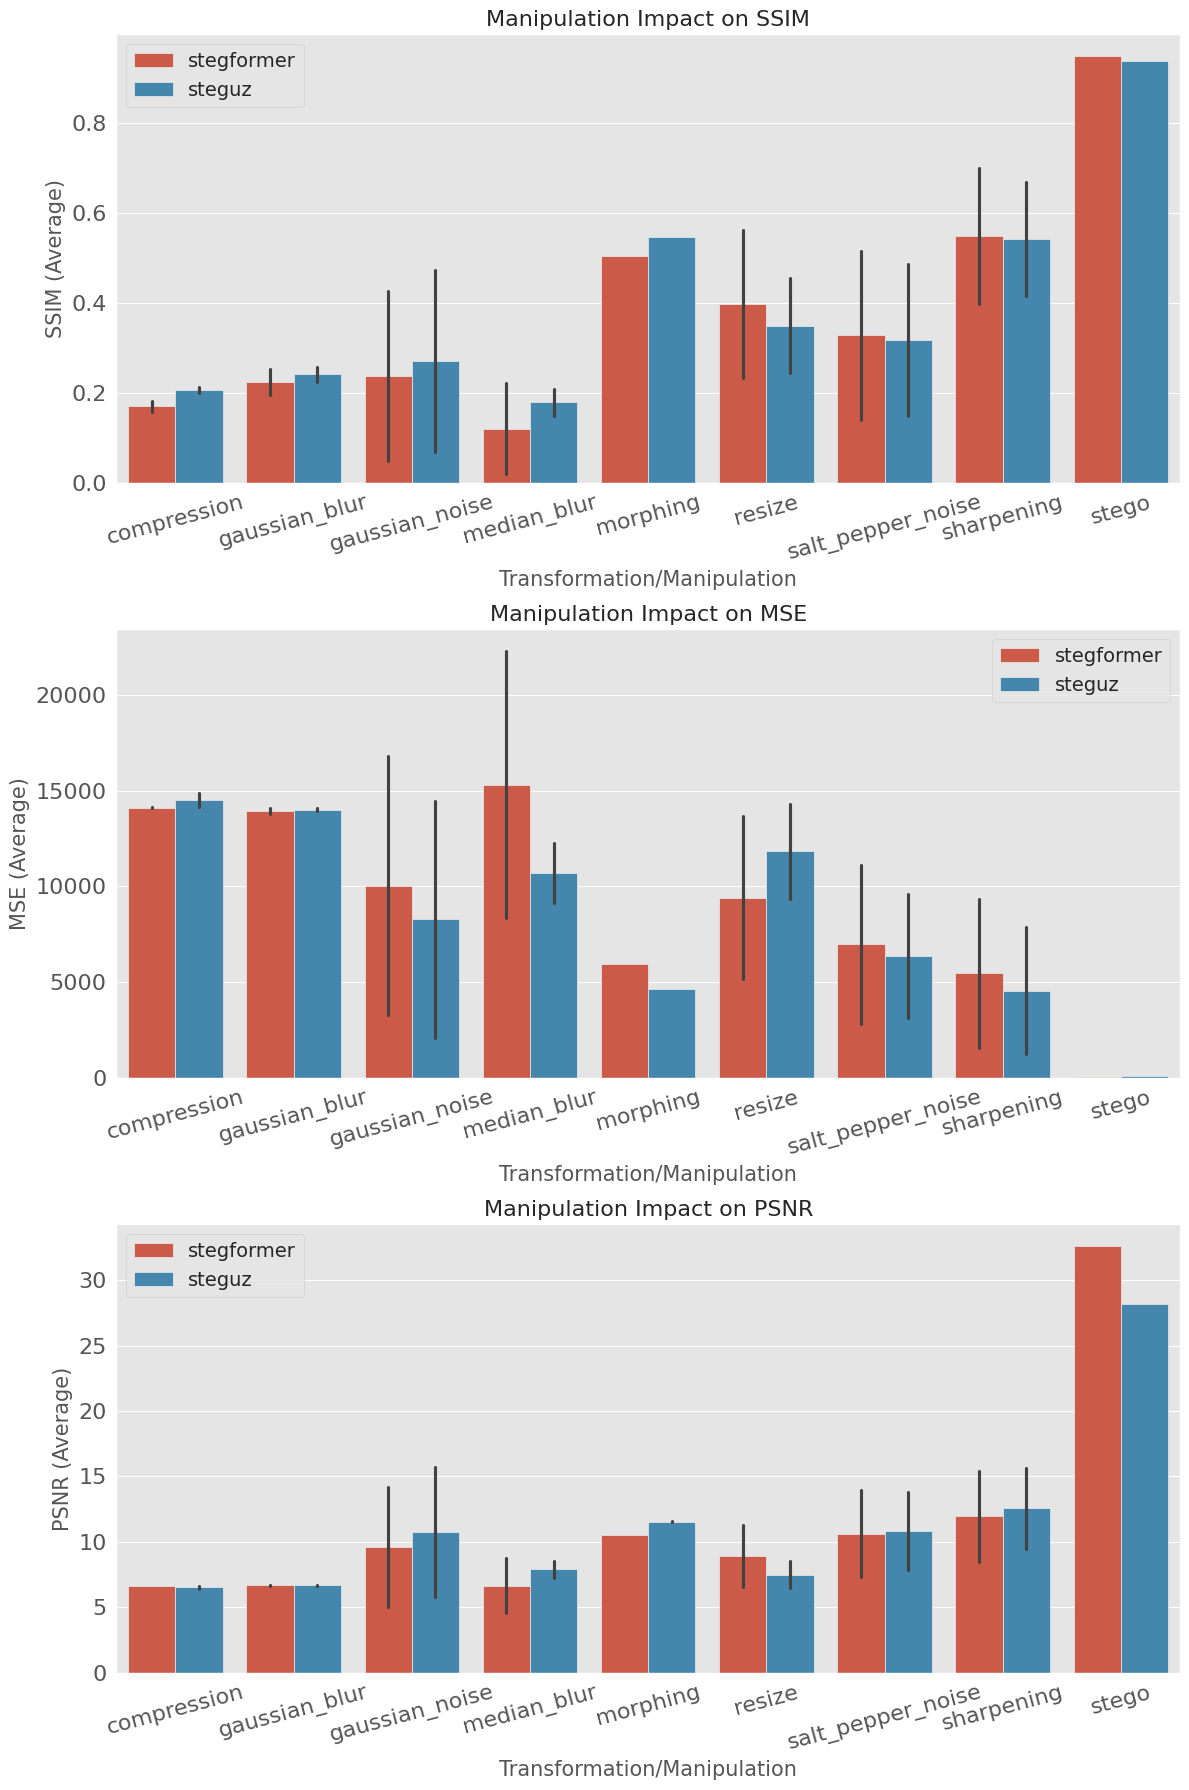

In [54]:
def plot_general_impact_manipulation_on_revealed(summary_all_trasnformations):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    
    metrics = [("ssim_mean", "SSIM (Average)"), ("mse_mean", "MSE (Average)"), ("psnr_mean", "PSNR (Average)")]
    titles = ["Manipulation Impact on SSIM",
              "Manipulation Impact on MSE",
              "Manipulation Impact on PSNR"]
    
    for ax, (metric, ylabel), title in zip(axes, metrics, titles):
        sns.barplot(x="operation", y=metric, hue="model", data=summary_all_trasnformations, ci="sd", ax=ax)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel("Transformation/Manipulation", fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='center', fontsize=16)
        ax.tick_params(axis='y', labelsize=16)
        ax.legend(fontsize=14)
    
    plt.tight_layout()
    #plt.suptitle("Impact of Transformations on Steganographic Image Recovery - High level", y=1.02, fontsize=16)
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/general_effects_on_revealed_high_level.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/general_effects_on_revealed_high_level.pdf')
    
    plt.show()

plot_general_impact_manipulation_on_revealed(summary_revealed)

In [44]:
summary_revealed.loc[summary_revealed.operation=='morphing', 'variant'] = 'morph'
temp_morph = summary_revealed.loc[summary_revealed.operation=='morphing', ['model', 'operation', 'variant','ssim_mean', 'ssim_std',
                                                              'mse_mean', 'mse_std', 'psnr_mean', 'psnr_std']].groupby(['model', 'operation', 'variant']).agg(['mean']).reset_index()
temp_morph.columns = temp_morph.columns.droplevel(1)
new_s_r = pd.concat([summary_revealed[summary_revealed.operation!='morphing'], temp_morph], axis=0, ignore_index=True)

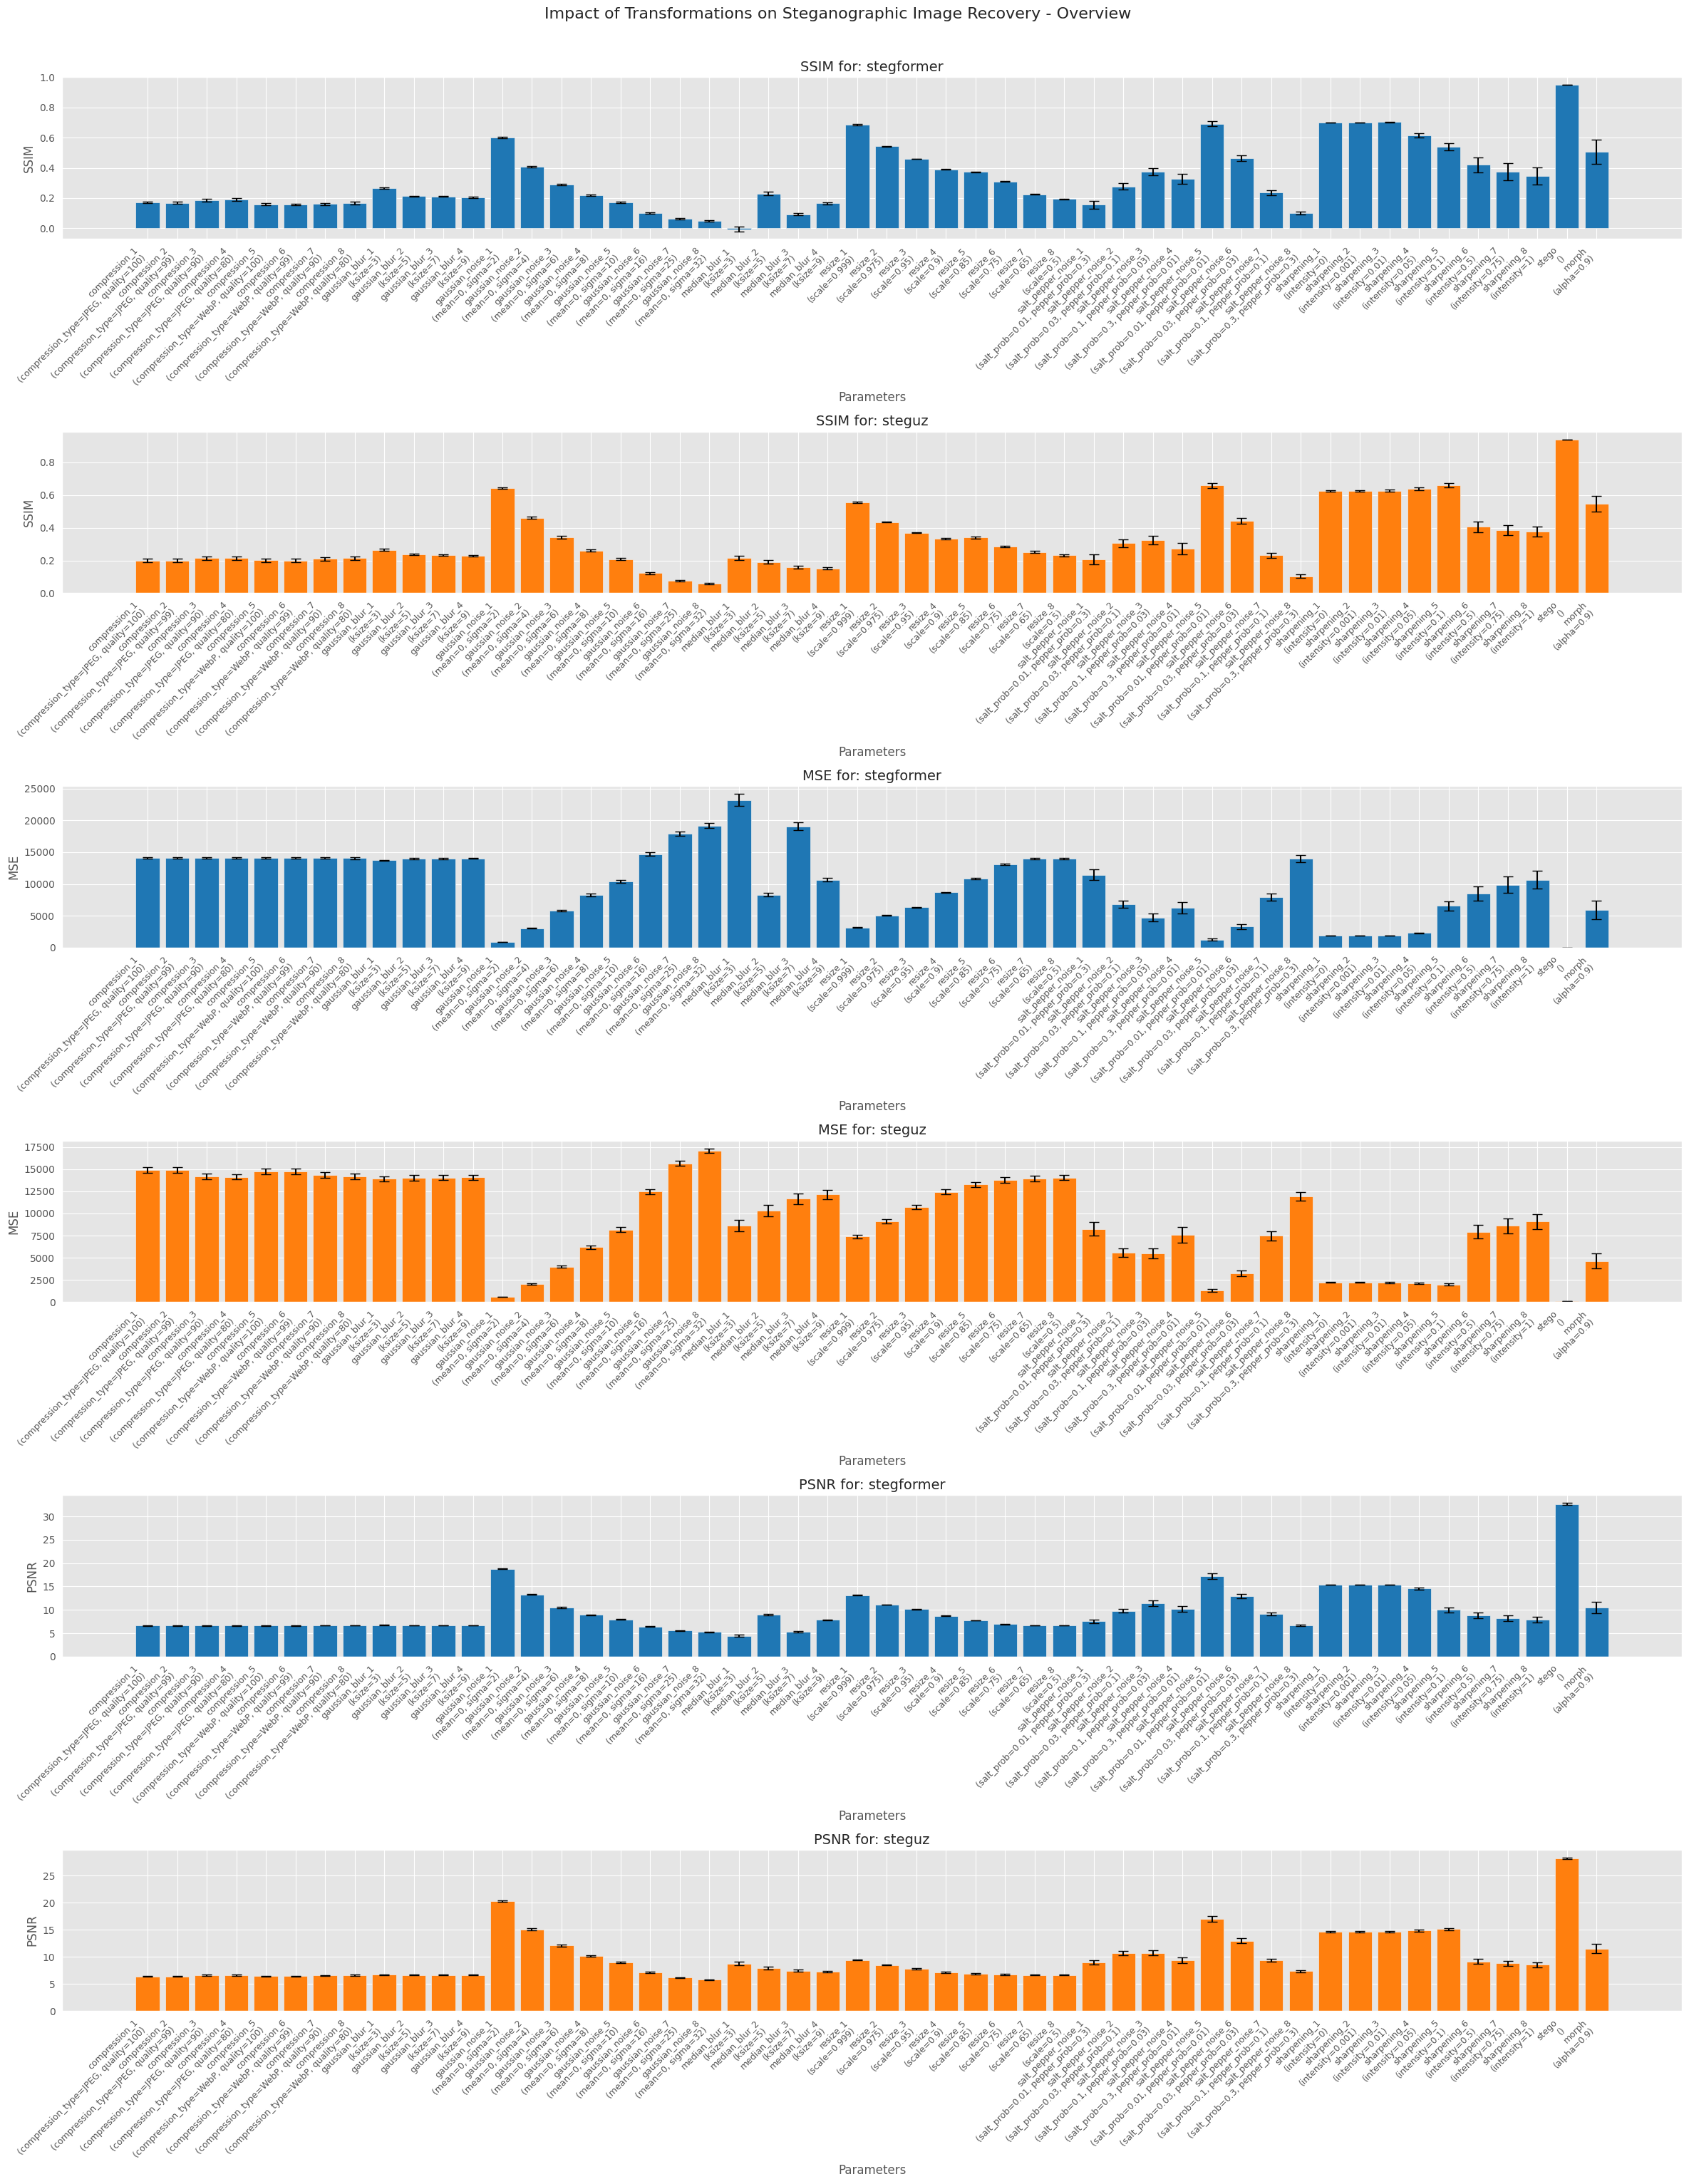

In [45]:
def plot_transformations_effect_on_revealed_by_model(summary_revealed, variant_params):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    #plt.style.use('seaborn-v0_8-whitegrid') 
    sns.set_palette("bright")  # Opciones recomendadas: "deep", "muted", "colorblind", "pastel"
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.style.use('ggplot')
    
    # seed
    np.random.seed(42)

    fig, axes = plt.subplots(6, 1, figsize=(24, 30))  # 6 filas (2 por métrica)
    metrics = ['ssim', 'mse', 'psnr']
    titles = ['SSIM', 'MSE', 'PSNR']
    models = summary_revealed['model'].unique()
    colors = ['#1f77b4', '#ff7f0e']  # colores diferentes por modelo
    
    # índice para subplots
    ax_idx = 0
    
    for metric, title in zip(metrics, titles):
        for model, color in zip(models, colors):
            subset = summary_revealed[summary_revealed['model'] == model]
            mean_values = subset[f'{metric}_mean']
            std_values = subset[f'{metric}_std']
    
            # gráfica de barras con desviación estándar
            axes[ax_idx].bar(mean_values.index.astype(str), mean_values, yerr=std_values, 
                             capsize=5, color=color)
    
            axes[ax_idx].set_title(f'{title} for: {model}', fontsize=14)
            axes[ax_idx].set_ylabel(title)
            axes[ax_idx].set_xlabel('Parameters')
    
            # Generar etiquetas claras con variante y parámetros
            new_labels = [f"{v}\n({variant_params.get(v, '')})" for v in subset['variant']]
    
            # Aplicar etiquetas corregidas al eje x
            axes[ax_idx].set_xticks(range(len(new_labels)))  # Asegura coincidencia correcta
            axes[ax_idx].set_xticklabels(new_labels, rotation=45, ha="right", fontsize=9)
    
    
            ax_idx += 1  # avanzar al siguiente subplot
    
    plt.tight_layout()
    plt.suptitle("Impact of Transformations on Steganographic Image Recovery - Overview", y=1.02, fontsize=16)
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_revealed_overview_with_morphing.png', dpi=300)#bbox_inches='tight'
    plt.savefig('/app/output/reveal/CFD_one_shot/reports/transformations_effects_on_revealed_overview_with_morphing.pdf')
    
    plt.show()

variant_params = {k: v.replace("{", "").replace("}", "").replace("'", "").replace(": ", "=") for k, v in mapping_dict.items()}
variant_params['morph'] = 'alpha=0.9'
plot_transformations_effect_on_revealed_by_model(new_s_r, variant_params)